#### Author: Allan Jeeboo
#### Preferred name: Vyncent van der Wolvenhuizen
#### Affiliation: Data Science student at Triple Ten
#### email: vanderwolvenhuizen.vyncent@proton.me
#### Date Started: 2025-02-13
#### Last Updated: 2025-02-14 21:15


# Table of Contents
## 1.0 Introduction
>### 1.1 Import Data
>### 1.2 Data Description
## 2.0 Data Cleaning
>### 2.1 Name & Genre NaNs
>### 2.2 Year of Release NaNs
>### 2.3 Critic Score NaNs
>### 2.4 User Score NaNs
>### 2.5 Rating NaNs
>### 2.6 Column Adjustments
>## 3.0 Exploratory Data Analysis (EDA)

## 1. Introduction

This project aims to identify patterns that determine whether or not a game succeeds. We'll be using a dataset from 2016; that data will be used to create forecasts and then serve to plan a campaign.

### 1.1 Import Data
Let's import the libraries we need and then load the data.

In [94]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt


df = pd.read_csv("games.csv")

df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


### 1.2 Data description
—Name 

—Platform 

—Year_of_Release 

—Genre 

—NA_sales (North American sales in USD million) 

—EU_sales (sales in Europe in USD million) 

—JP_sales (sales in Japan in USD million) 

—Other_sales (sales in other countries in USD million) 

—Critic_Score (maximum of 100) 

—User_Score (maximum of 10) 

—Rating (ESRB)

Data for 2016 may be incomplete.

This text is taken from the Itegrated Project 1 overview page on Triple Ten.
https://tripleten.com/trainer/data-scientist/lesson/2fede7ea-9ca6-42a3-ba35-bf4142d2fcc0/

## 2.0 Data Cleaning
Let's chanage the column names to lowercase out of good practice then look at the dtypes, nans, and shape.

In [95]:
# Change column names to lowercase
df = df.rename(columns= {"Name": "name", 
                         "Platform": "platform", 
                         "Year_of_Release": "year_of_release", 
                         "Genre": "genre", 
                         "NA_sales": "na_sales", 
                         "EU_sales": "eu_sales", 
                         "JP_sales": "jp_sales", 
                         "Other_sales": "other_sales", 
                         "Critic_Score": "critic_score", 
                         "User_Score": "user_score", 
                         "Rating": "rating"})

df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [96]:
df.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

In [97]:
# nan check
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [98]:
# Percentage of nan values in columns
df.isna().sum()/df.shape[0]

name               0.000120
platform           0.000000
year_of_release    0.016093
genre              0.000120
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.513192
user_score         0.400897
rating             0.404786
dtype: float64

In [99]:
# There are two missing names, which rows are they?
df[df.name.isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


### 2.1 Name & Genre NaNs

There are two nans in both 'name' and 'genre'; from the line above we can see that they that they're the same row. Let's use fillna on the two nan valuess in the "name" and "genre" columns with [a]"Unknown" and [b]"genre.mode" respectively. 

[a] The names of these two games aren't necessary for this project.

[b] 'genre' isn't numerical, so you can't take the mean of it and it wouldn't make sense to take the median of this column; the mode ('action') comprises ~20% of the data which works well because it's only two values out of 16,715 (0.01% of the data).

In [100]:
# Number of games in a specific genre 
df.groupby("genre").size()/df.shape[0]

genre
Action          0.201555
Adventure       0.077954
Fighting        0.050793
Misc            0.104696
Platform        0.053126
Puzzle          0.034699
Racing          0.074723
Role-Playing    0.089620
Shooter         0.079150
Simulation      0.052229
Sports          0.140473
Strategy        0.040862
dtype: float64

In [101]:
df.genre = df.genre.fillna(df.genre.mode()[0])
df.genre.isna().sum()

np.int64(0)

### 2.2 Year of Release NaNs

Alright. Let's move on to 'year_of_release'. In order to get a quick look at the percentage of games released in a given year, we'll set a variable called 'games_per_year', then call .groupby() on 'year_of_release' followed by .size() to count the number of games released in a given year. We'll then take that variable and divide it by the amount of rows in the dataset. After that, we'll calculate the mean, median, and mode before then deciding on how to approach filling the values.

Initial thoughts: I believe that older games are more likely to have missing values; however that's based on the assumption that data on older games is less abundant and more likely to have been lost.

In [102]:
df.groupby("year_of_release").size()

year_of_release
1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      62
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     350
2001.0     482
2002.0     829
2003.0     775
2004.0     762
2005.0     939
2006.0    1006
2007.0    1197
2008.0    1427
2009.0    1426
2010.0    1255
2011.0    1136
2012.0     653
2013.0     544
2014.0     581
2015.0     606
2016.0     502
dtype: int64

In [103]:
df.year_of_release.mean()

np.float64(2006.4846163200777)

In [104]:
df.year_of_release.median()

np.float64(2007.0)

In [105]:
df.year_of_release.mode()

0    2008.0
Name: year_of_release, dtype: float64

In [106]:
# All of our rows came with their 'platform' data intact, so we can groupby platform and check for nans in to get an idea of where the most nans are occuring.
year_nans = df.year_of_release.isna().sum()
year_nans_by_platform = df.groupby('platform')['year_of_release'].apply(lambda x: x.isna().sum())

(year_nans_by_platform/year_nans) * 100

platform
2600     6.319703
3DO      0.000000
3DS      2.973978
DC       0.000000
DS      11.152416
GB       0.371747
GBA      4.089219
GC       5.204461
GEN      0.000000
GG       0.000000
N64      1.115242
NES      0.000000
NG       0.000000
PC       6.319703
PCFX     0.000000
PS       2.602230
PS2     12.639405
PS3      9.293680
PS4      0.000000
PSP      5.947955
PSV      0.371747
SAT      0.000000
SCD      0.000000
SNES     0.000000
TG16     0.000000
WS       0.000000
Wii     12.639405
WiiU     0.000000
X360    11.152416
XB       7.806691
XOne     0.000000
Name: year_of_release, dtype: float64

So as for my initial thoughts, the data suggests that I'm incorrect. We have a mean of mid 2006, a median of 2007, and a mode of 2008. There is a high clustering of data between the years 2005 - 2011 and all of the platforms that have >5% of their values as NaNs (aside from the 2600) are generation 6 and 7. The 8th gen of platforms began in 2012, and since this data is form 2016, systems such as the PS4, WiiU, and XOne don't have as much time or information to make an impact. Considering the values, the mode would make more sense because it sits close to the middle of the length of the 6th and 7th gens (1998 - 2017).

A note to those who are non-gamers, platform generations do overlap, e.g., the 9th generation began in 2020 with the release of the PS5 and XBox Series X/S, but the 8th generation is still ongoing as well; however, following historical patterns, the 8th generation should end either this or next year with the anticipation of the 10th generation beginning in 2027 or 2028. 

Note to self: Come back and site sources. 

In [107]:
df.year_of_release = df.year_of_release.fillna(df.year_of_release.mode()[0])

It doesn't make sense for this column to be a float, so let's change it to int.

In [108]:
df.year_of_release = df.year_of_release.astype(int)

df.year_of_release

0        2006
1        1985
2        2008
3        2009
4        1996
         ... 
16710    2016
16711    2006
16712    2016
16713    2003
16714    2016
Name: year_of_release, Length: 16715, dtype: int64

### 2.3 Critic Score NaNs
Time to deal with the "critic_score" nans. First let's find the mean and median, but we'll .groupby() "genre" before applying these methods. Since grouping by genre provides us with narrower values, if we were to pick a game with a nan out of some genre of choice, we now have an idea of where that game's rating is likely to be found. (You really sound conVyncing (om nah I'n just do that fr fr buhhh). Fix later teehee :3).

In [109]:
critic_score_mean = df.groupby("genre")["critic_score"].mean()
print(f'Critic score mean: \n {critic_score_mean} \n')

critic_score_median = df.groupby("genre")["critic_score"].median()
print(f'Critic score median: \n {critic_score_median}')

Critic score mean: 
 genre
Action          66.629101
Adventure       65.331269
Fighting        69.217604
Misc            66.619503
Platform        68.058350
Puzzle          67.424107
Racing          67.963612
Role-Playing    72.652646
Shooter         70.181144
Simulation      68.619318
Sports          71.968174
Strategy        72.086093
Name: critic_score, dtype: float64 

Critic score median: 
 genre
Action          68.0
Adventure       66.0
Fighting        72.0
Misc            69.0
Platform        69.0
Puzzle          70.0
Racing          69.0
Role-Playing    74.0
Shooter         73.0
Simulation      70.0
Sports          75.0
Strategy        73.0
Name: critic_score, dtype: float64


Based on the given information, I'll use the median. Some games could receive a low score which could skew the data towards a lower value, as it would seem to show. The median, however, displays the value smack dab in the middle of the set ... Because all values in the column are whole numbers, it would look cleaner to change it to int.

Note to self: cook on it.

In [110]:
df.critic_score = df.critic_score.fillna(critic_score_median[1])
df

C:\Users\vande\AppData\Local\Temp\ipykernel_12432\3914514905.py:1: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,66.0,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,66.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,66.0,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,66.0,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,66.0,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,66.0,NaN,NaN


In [111]:
df.critic_score = df.critic_score.astype(int)
df.critic_score.dtype

dtype('int64')

In [112]:
df.isna().sum()

name                  2
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score         6701
rating             6766
dtype: int64

### 2.4 User Score NaNs

In [113]:
df.user_score.unique()


array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

There's a unique value called 'tbd' in this column. Let's convert it/them to nans. Afterward, we'll start dealing with the column's nan values. First we'll .groupby() "genre", then take the mean and median. 

In [114]:
df.user_score = df.user_score.replace("tbd", np.nan)
df.user_score.unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [115]:
# Convert user_score to numeric, coercing errors to NaN
df.user_score = pd.to_numeric(df.user_score, errors='coerce')

#Calculate mean and median user scores by genre
genre_user_mean = df.groupby("genre")["user_score"].mean()
print(f'User mean by genre: \n {genre_user_mean}')

genre_user_median = df.groupby("genre")["user_score"].median()
print(f'User median by genre: \n\n {genre_user_median}')

User mean by genre: 
 genre
Action          7.054044
Adventure       7.133000
Fighting        7.302506
Misc            6.819362
Platform        7.301402
Puzzle          7.175000
Racing          7.036193
Role-Playing    7.619515
Shooter         7.041883
Simulation      7.134593
Sports          6.961197
Strategy        7.295177
Name: user_score, dtype: float64
User median by genre: 

 genre
Action          7.4
Adventure       7.6
Fighting        7.6
Misc            7.1
Platform        7.7
Puzzle          7.5
Racing          7.4
Role-Playing    7.8
Shooter         7.4
Simulation      7.5
Sports          7.4
Strategy        7.8
Name: user_score, dtype: float64


With this column, we'll use the median to fill the nans, just like the previous column.

In [116]:
df.user_score = df.user_score.fillna(genre_user_median[1])
df

C:\Users\vande\AppData\Local\Temp\ipykernel_12432\2185083810.py:1: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,66,7.6,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,66,7.6,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,66,7.6,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,66,7.6,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,66,7.6,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,66,7.6,NaN


In [117]:
df.isna().sum()

name                  2
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score            0
rating             6766
dtype: int64

### 2.5 Rating NaNs
My approach to this is to again groupby "genre", but then apply the lambda parameter and mode. It wouldn't make sense to take the mean of a series of strings, and the median would provide the value in the middle of the list as opposed to something close to 'average'. 

In [118]:
# I'm gonna need an explanation on wtf this means.
rating_mode = df.groupby("genre")["rating"].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
df['rating'] = df.groupby("genre")["rating"].transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else np.nan))
print(rating_mode)

genre
Action          T
Adventure       E
Fighting        T
Misc            E
Platform        E
Puzzle          E
Racing          E
Role-Playing    T
Shooter         M
Simulation      E
Sports          E
Strategy        T
Name: rating, dtype: object


In [119]:
df.isna().sum()

name               2
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

In [120]:
df.dtypes

name                object
platform            object
year_of_release      int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score         int64
user_score         float64
rating              object
dtype: object

### 2.6 Column adjustments
It'd be useful to see the total amount of sales, so let's create a column for that and then reorder the column names so that our new column appears between "other_sales" and "critic_score".

In [121]:
# Calculate total sales (sum of all sales in every region) for each game and place the results in a seperate column.
df["total_sales"] = df["na_sales"] + df["eu_sales"] + df["jp_sales"] + df["other_sales"]

df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,66,7.6,E,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,66,7.6,T,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,66,7.6,T,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,66,7.6,E,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,66,7.6,E,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,66,7.6,E,0.01


In [122]:
new_column_order = ['name', 
                    'platform', 
                    'year_of_release', 
                    'genre', 
                    'na_sales', 
                    'eu_sales', 
                    'jp_sales', 
                    'other_sales', 
                    'total_sales', 
                    'critic_score', 
                    'user_score', 
                    'rating']

df = df[new_column_order] 
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,82.54,76,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,40.24,66,7.6,E
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,35.52,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,32.77,80,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,31.38,66,7.6,T
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0.01,66,7.6,T
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,0.01,66,7.6,E
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.01,66,7.6,E
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,0.01,66,7.6,E


## 3.0 Exploratory Data Analysis (EDA)

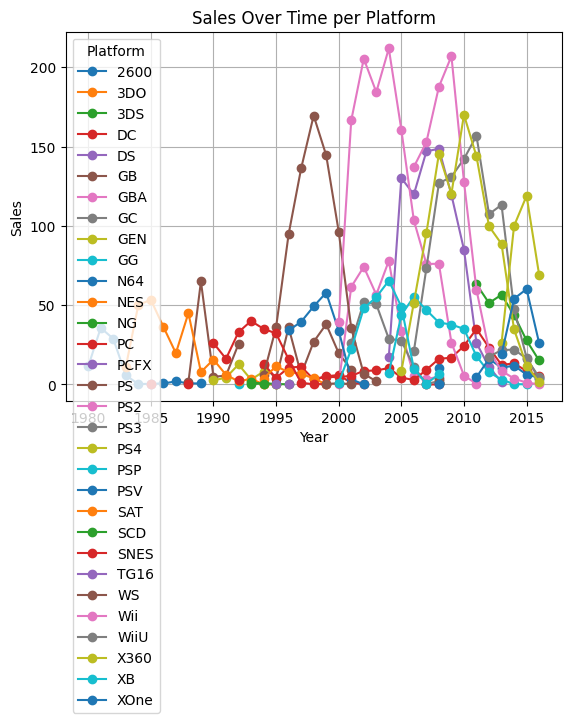

In [ ]:
sales_over_time = df.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack()

# Plot the data
sales_over_time.plot(kind='line', marker='o')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Sales Over Time per Platform')
plt.legend(title='Platform')
plt.grid(True)
plt.
# Show the plot
plt.show()

<Axes: title={'center': 'Total Sales by Platform'}, xlabel='Year', ylabel='Total Sales'>

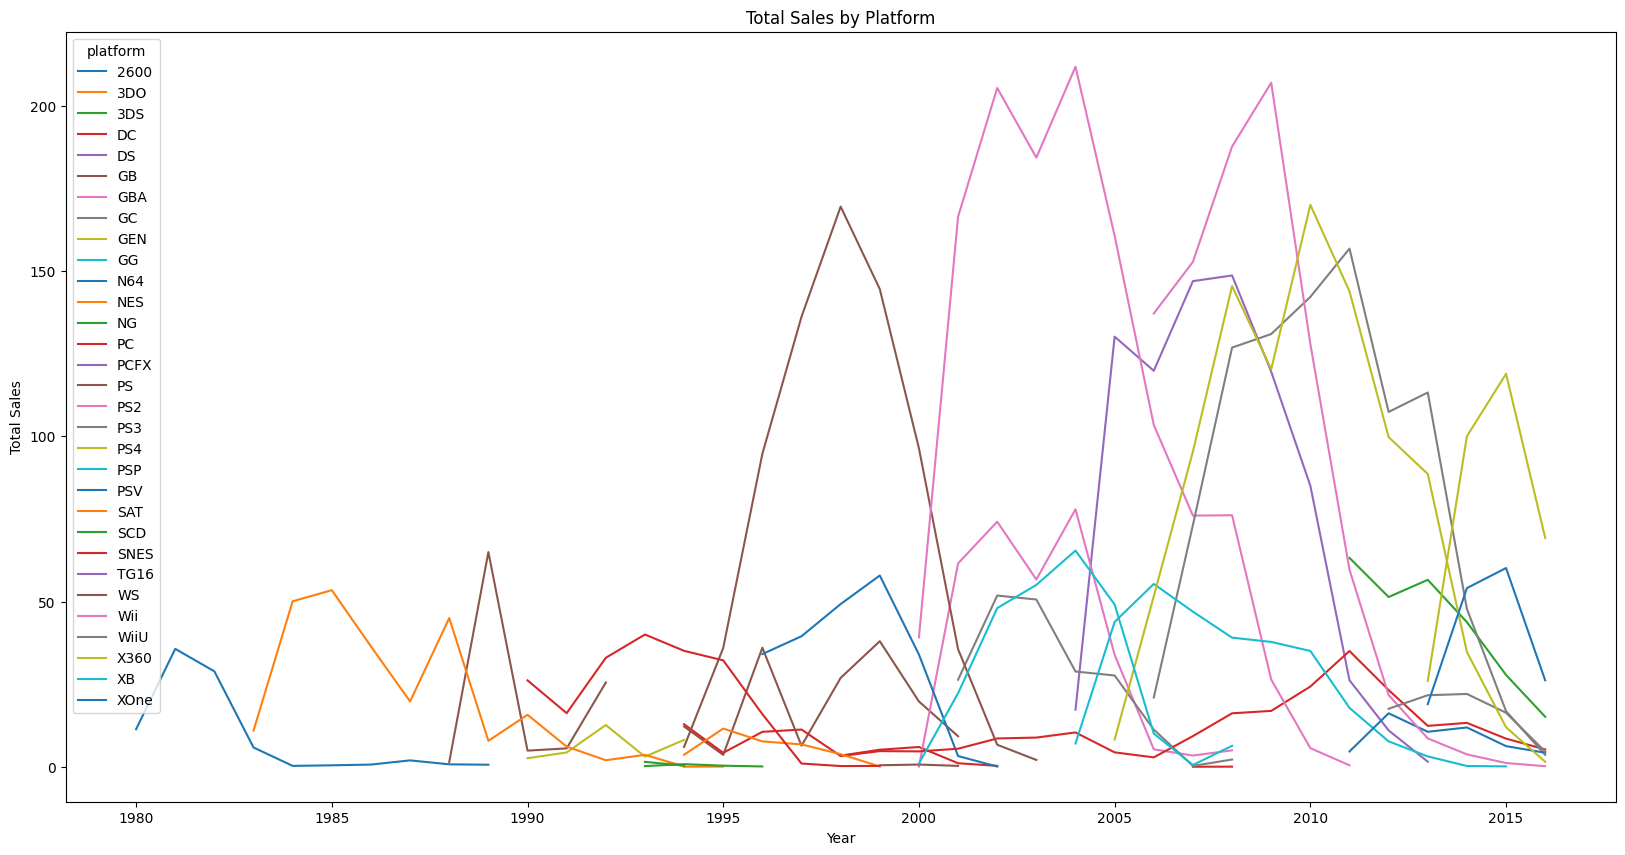

In [ ]:
sales_by_platform = df.groupby(["year_of_release", "platform"])["total_sales"].sum().unstack()

sales_by_platform.plot(kind= 'line', 
                       figsize= (20, 10), 
                       title= 'Total Sales by Platform', 
                       xlabel= 'Year', 
                       ylabel= 'Total Sales')

In [ ]:
df.groupby("platform")["total_sales"].sum()

platform
2600      96.98
3DO        0.10
3DS      259.00
DC        15.95
DS       806.12
GB       255.46
GBA      317.85
GC       198.93
GEN       30.77
GG         0.04
N64      218.68
NES      251.05
NG         1.44
PC       259.52
PCFX       0.03
PS       730.86
PS2     1255.77
PS3      939.65
PS4      314.14
PSP      294.05
PSV       54.07
SAT       33.59
SCD        1.86
SNES     200.04
TG16       0.16
WS         1.42
Wii      907.51
WiiU      82.19
X360     971.42
XB       257.74
XOne     159.32
Name: total_sales, dtype: float64